# Model training results - without PCA's feature reduction

This notebook has the set of tested model performances regarding chosen numbers of layers, numbers of neurons. Additionaly I performed accuracy test for the most promising result adding dropout layer. 

## Prepare

In [1]:
from keras import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import ImageLoader
import tensorflow as tf
import numpy as np

In [2]:
images_dataframe = ImageLoader.load()
targets_dataframe = pd.read_csv("cleaned_fashion.csv", sep=';')
targets_dataframe.set_index("id", inplace=True)
classes = targets_dataframe.target.unique()
targets_numeric = np.arange(classes.size, dtype=int)
targets_dict = dict(zip(classes, targets_numeric))
targets_dataframe['target_numeric'] = [ targets_dict.get(target) for target in targets_dataframe.target ]

In [3]:
X = images_dataframe.values
y = targets_dataframe.target_numeric
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=120)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

## Plotting functions

In [4]:
import matplotlib.pyplot as plt
def plot_classification(y_pred, y_true, model_name):
    # Create the figure and 1x3 grid for subplots
    plt.figure(figsize=(20, 5))
    
    correct_ids = np.where(y_true == y_pred)[0]
    incorrect_ids = np.where(y_true != y_pred)[0]
    
    # Subplot 1: Correct classifications
    plt.ylim(-0.5, 7.5)
    plt.scatter(range(len(y_pred[correct_ids])), y_pred[correct_ids], marker='o', s=2, c=y_true[correct_ids])
    plt.xlabel('Test Samples')
    plt.ylabel('Predicted Classes')
    plt.title(f'Correct classification via {model_name}')
    plt.show()

    plt.figure(figsize=(20, 5))
    # Subplot 2: Incorrect classifications
    plt.subplot(1, 2, 1)  # 1 row, 3 columns, second subplot
    plt.ylim(-0.5, 7.5)
    plt.scatter(range(len(y_pred[incorrect_ids])), y_pred[incorrect_ids], marker='o', s=8, c=y_true[incorrect_ids])
    plt.title(f'Incorrect classification via {model_name}')
    plt.tight_layout()
    
    # Subplot 3: Correct values for incorrect classifications
    plt.subplot(1, 2, 2)  # 1 row, 3 columns, third subplot
    plt.ylim(-0.5, 7.5)
    plt.scatter(range(len(y_true[incorrect_ids])), y_true[incorrect_ids], marker='o', s=8, c=y_true[incorrect_ids])
    plt.title(f'Correct value for incorrect classification via {model_name}')
    plt.tight_layout()
    
    plt.show()
    print(f'Incorrectly classified {len(y_pred[incorrect_ids])} samples out of {len(y_true)}')

import pickle
def training_plot(filename):
    with open(filename, "rb") as file:
        loaded_history = pickle.load(file)
    
    # summarize history for loss
    plt.plot(loaded_history.get('loss'))
    plt.plot(loaded_history.get('val_loss'))
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show() 

## 2 hidden layers - both half the size of features number

In [5]:
classes_num = classes.size
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_last = Dense( num_features//2, activation='relu')(hidden_layer_1)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('best_model_random_state_5.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 10/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step    

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Accuracy: 92.01%


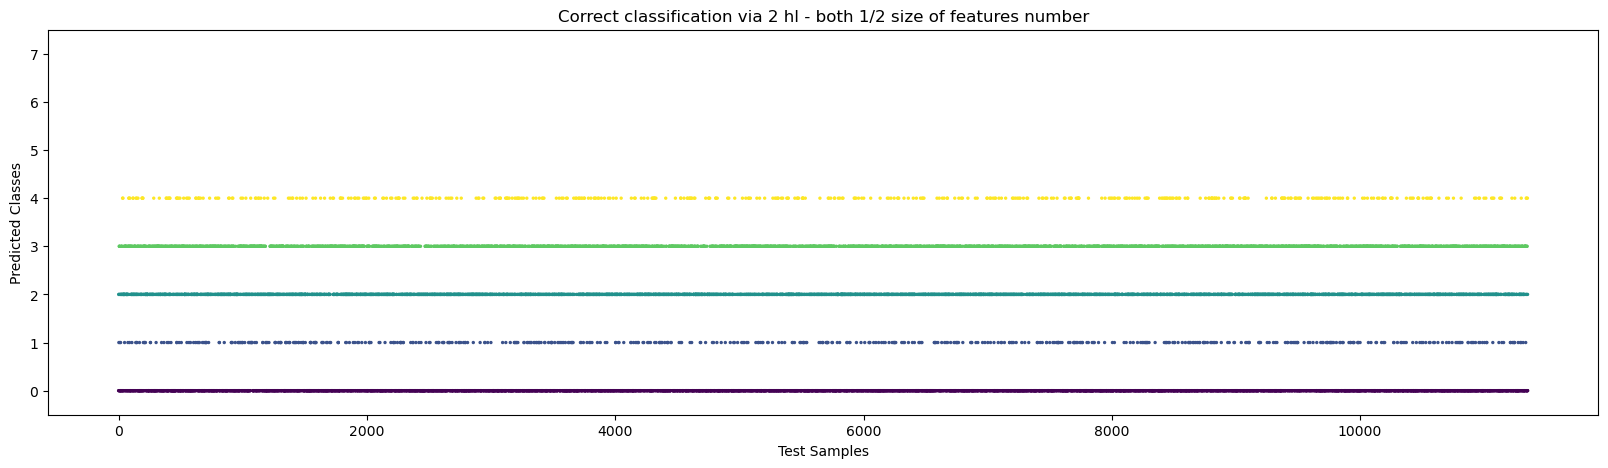

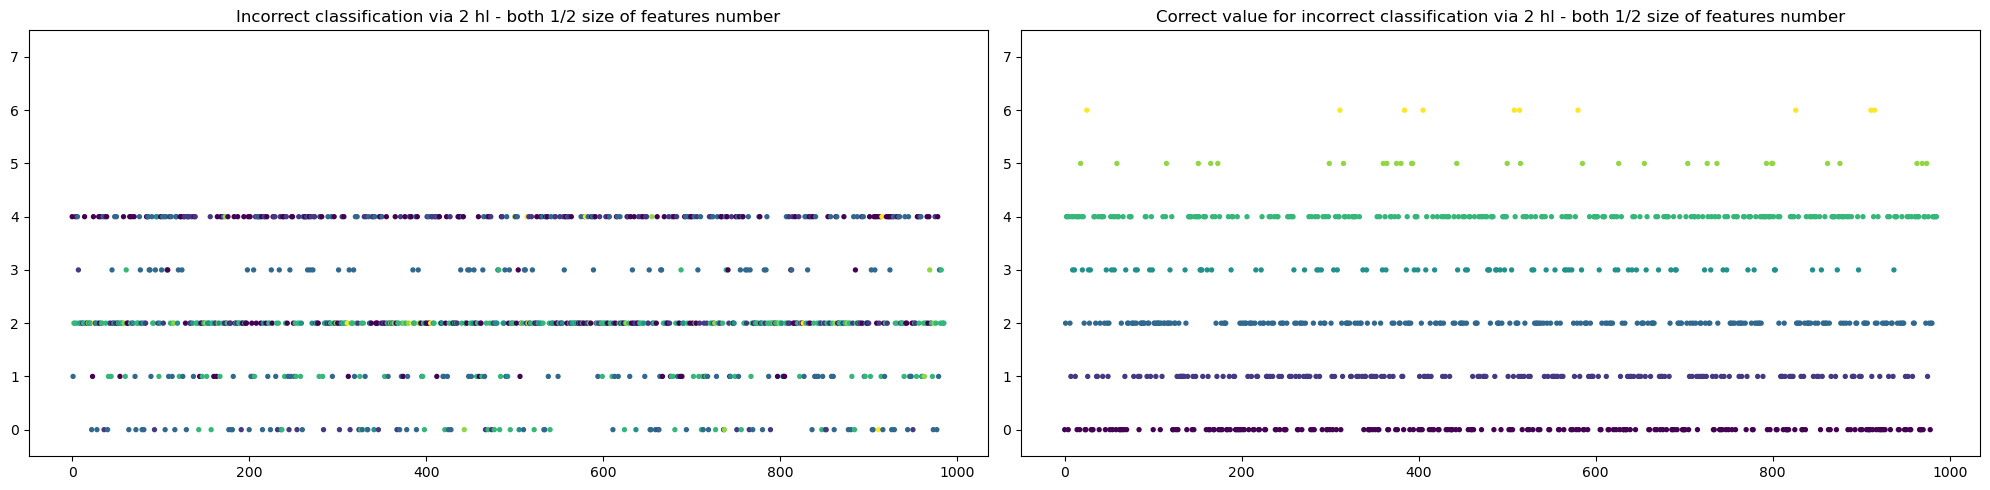

Incorrectly classified 986 samples out of 12337


In [6]:
plot_classification(y_pred_classes, y_test_classes, "2 hl - both 1/2 size of features number")

## 2 hidden layers - 1st layer half, 2nd quarter of features number

In [7]:
classes_num = classes.size
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_last = Dense( num_features//4, activation='relu')(hidden_layer_1)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('best_model_2_layers_Second_layer_quarter.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 33/386 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_4']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 93.36%


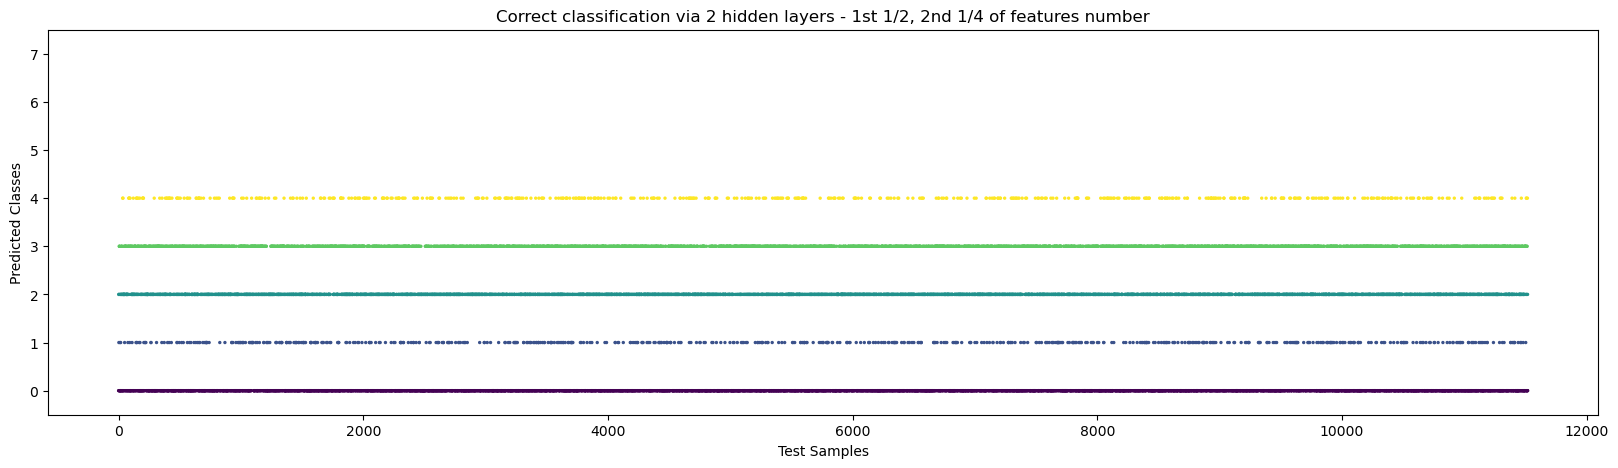

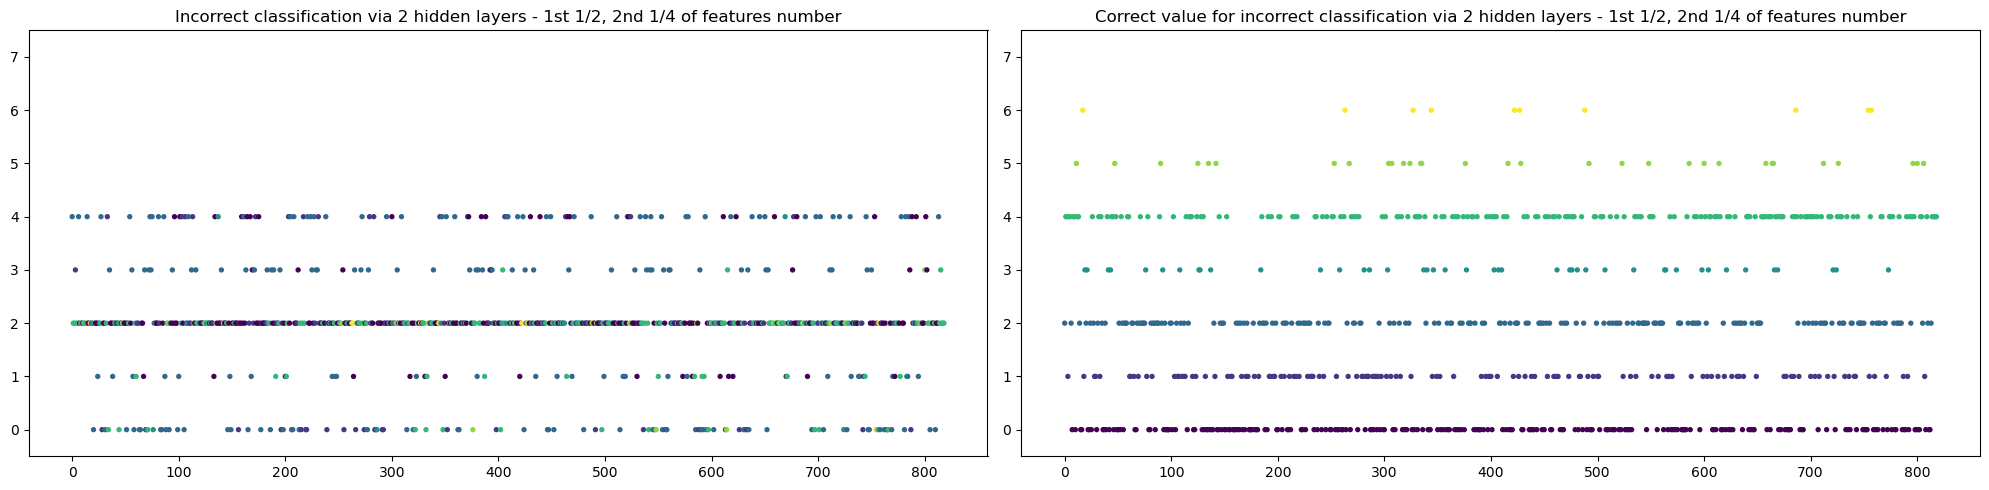

Incorrectly classified 819 samples out of 12337


In [8]:
plot_classification(y_pred_classes, y_test_classes, "2 hidden layers - 1st 1/2, 2nd 1/4 of features number")

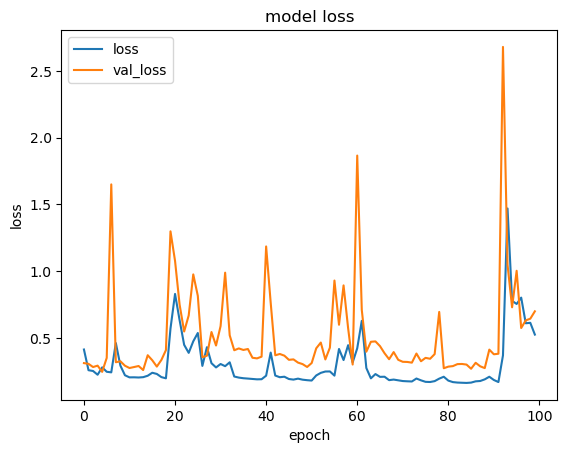

In [9]:
training_plot("training_history_2_layers_Second_quarter.pkl")

## 2 hidden layers - 1st 1/4 2nd 1/4

In [10]:
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//4, activation='relu')(input_layer)
hidden_layer_last = Dense( num_features//4, activation='relu')(hidden_layer_1)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('best_model_2_layers_Both_quarter.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 50/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_8']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 92.88%


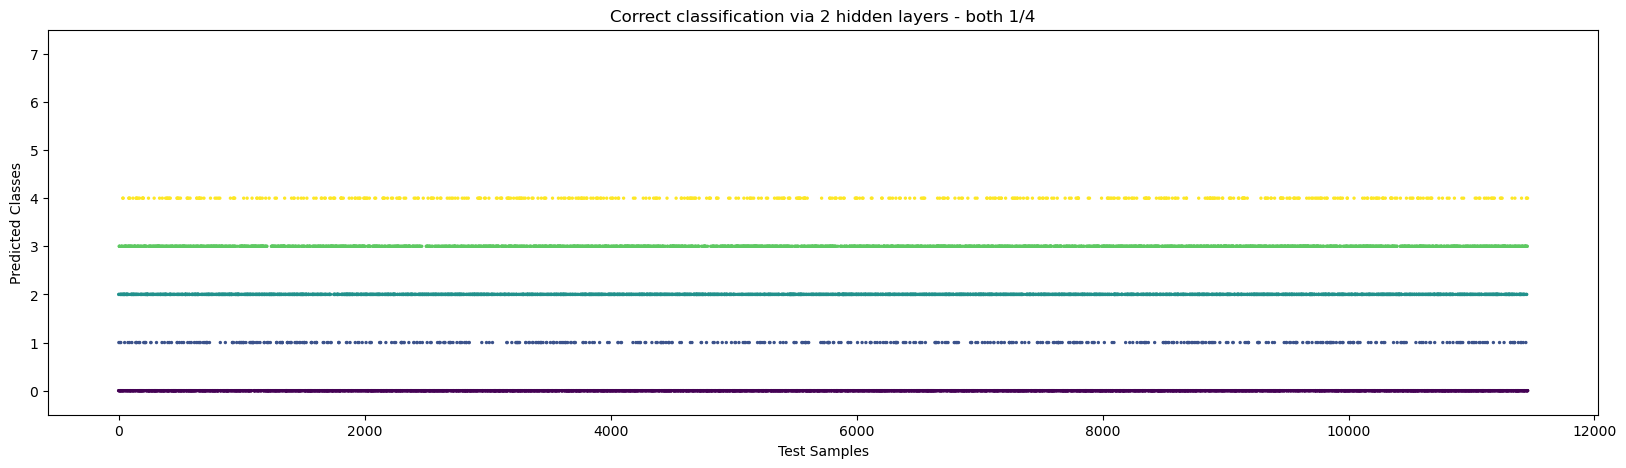

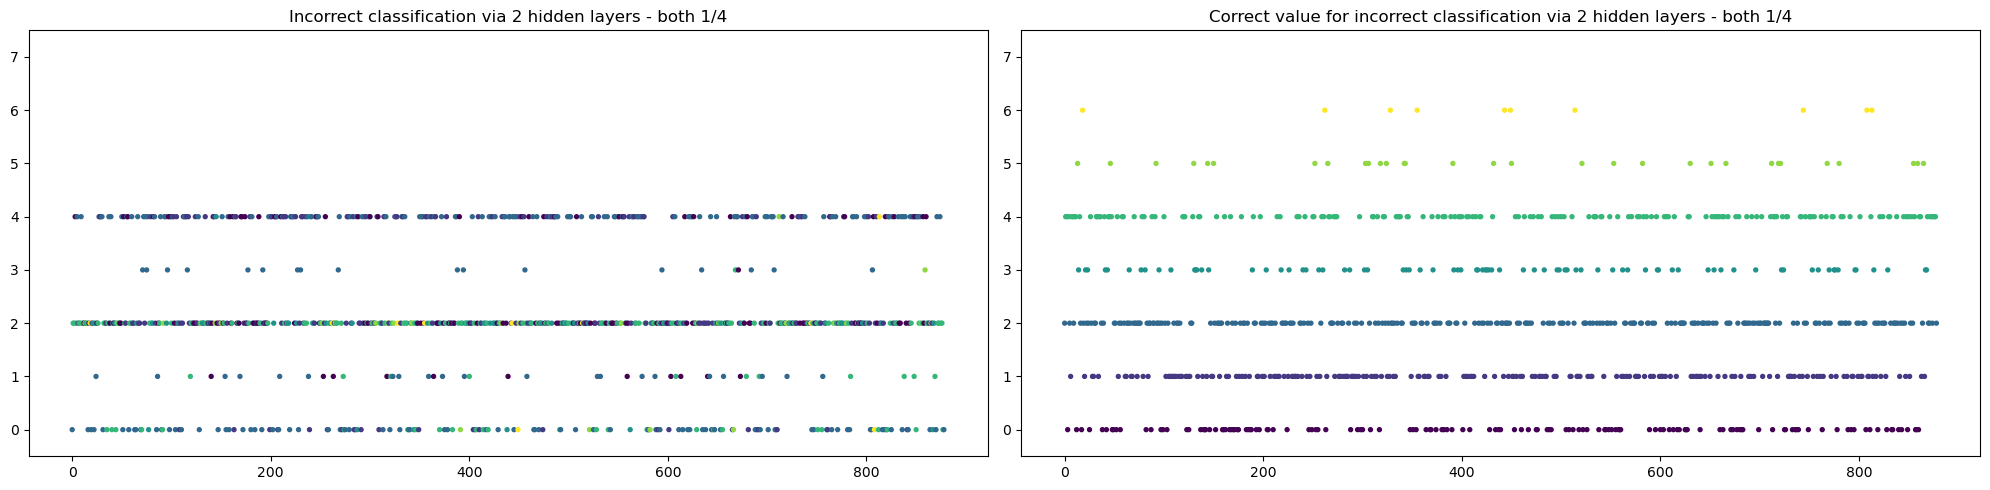

Incorrectly classified 879 samples out of 12337


In [11]:
plot_classification(y_pred_classes, y_test_classes, "2 hidden layers - both 1/4")

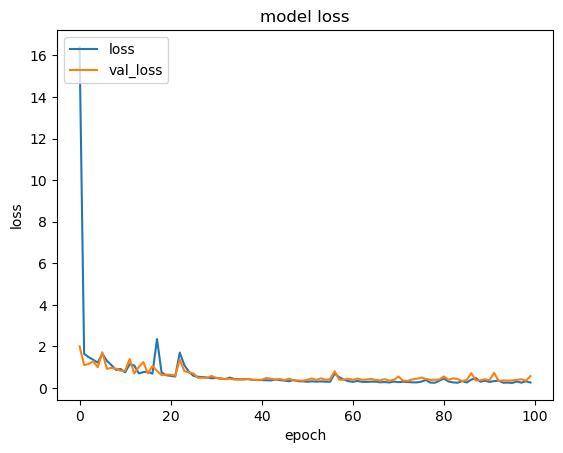

In [12]:
training_plot("training_history_2_layers_Both_quarter.pkl")

## 3 hidden layers - 1st 1/2, 2nd 1/4, 3rd 1/4

In [13]:
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_2= Dense( num_features//4, activation='relu')(hidden_layer_1)
hidden_layer_last = Dense( num_features//4, activation='relu')(hidden_layer_2)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('best_model_3_layers_2_3_quarter-long-train.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 29/386 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_12']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 94.80%


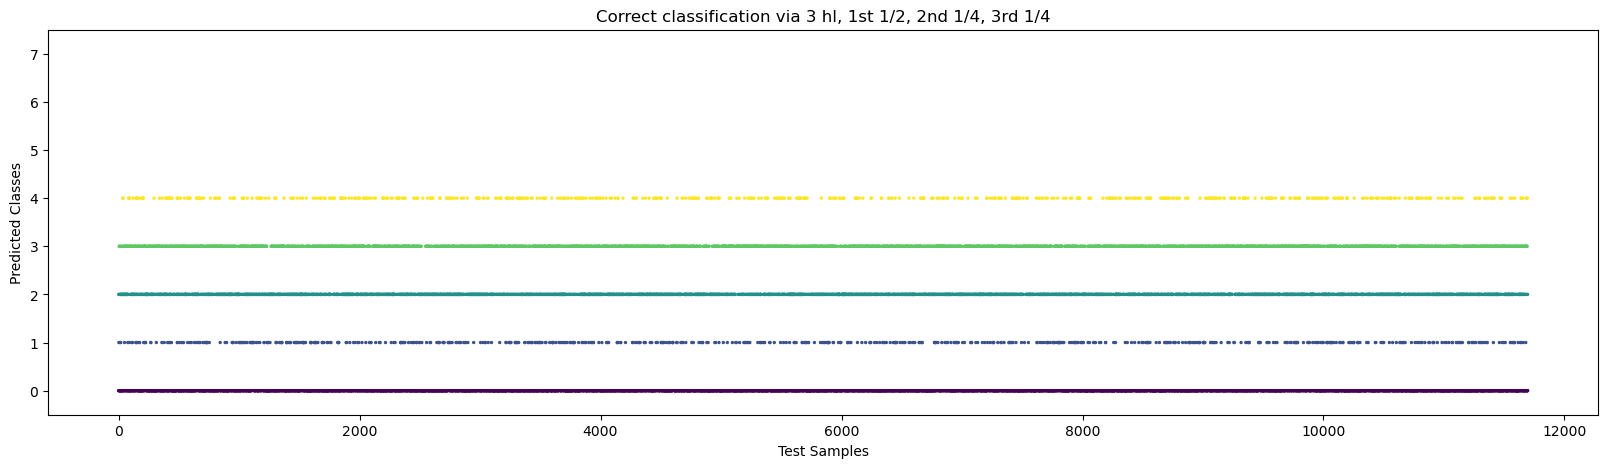

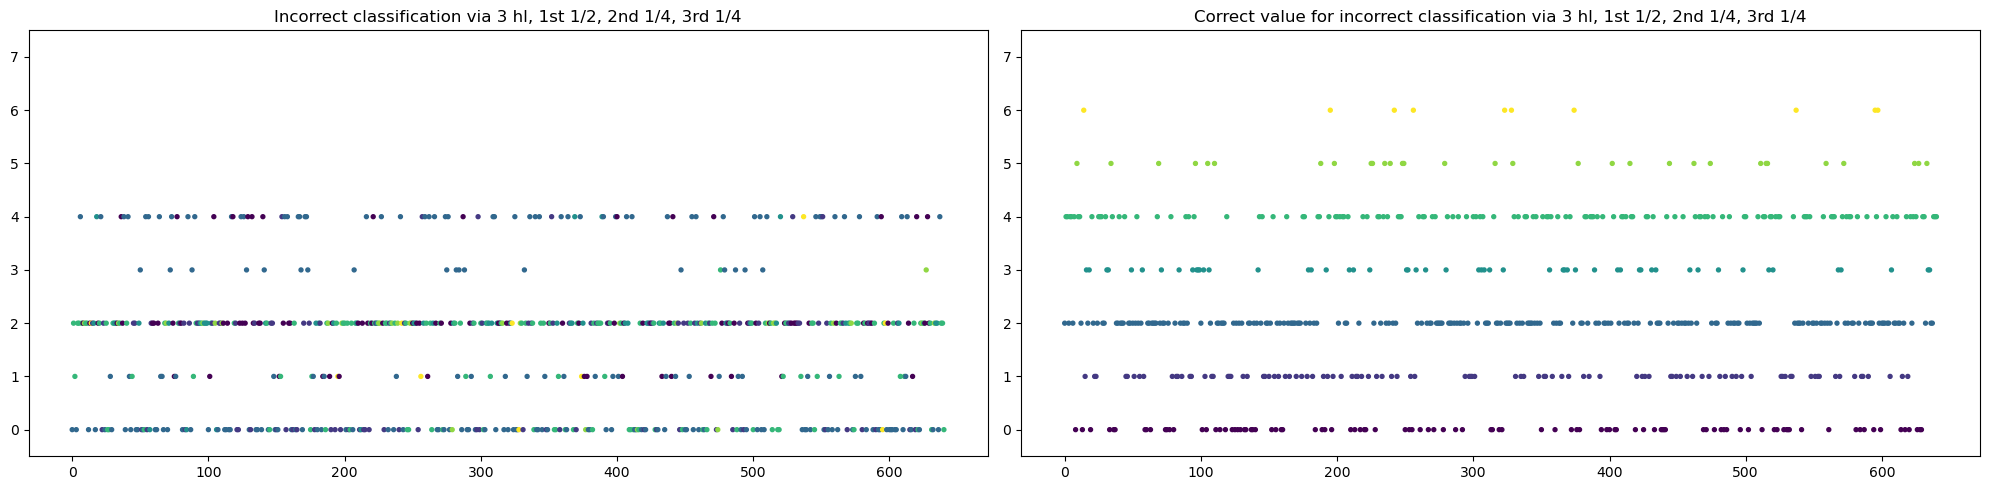

Incorrectly classified 641 samples out of 12337


In [14]:
plot_classification(y_pred_classes, y_test_classes, "3 hl, 1st 1/2, 2nd 1/4, 3rd 1/4")

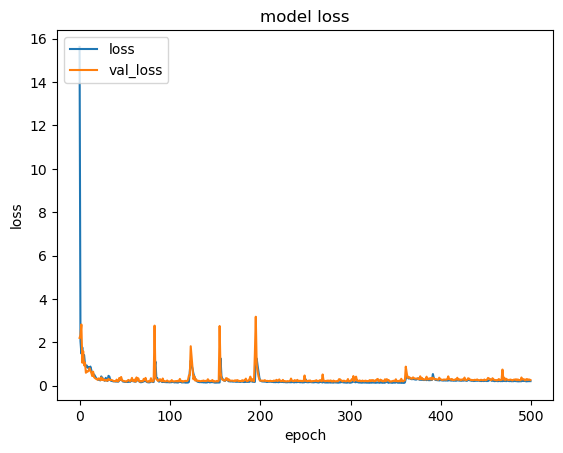

In [15]:
training_plot("training_history_3_layers_2_3_quarter-long-train.pkl")

## 3 hidden layers - 1st 1/2, 2nd 1/4, 3rd 1/8

In [16]:
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_2 = Dense( num_features//4, activation='relu')(hidden_layer_1)
hidden_layer_last = Dense( num_features//8, activation='relu')(hidden_layer_2)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('best_model_3_layers_2_quarter_3_one-eighth.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 32/386 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_17']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 93.00%


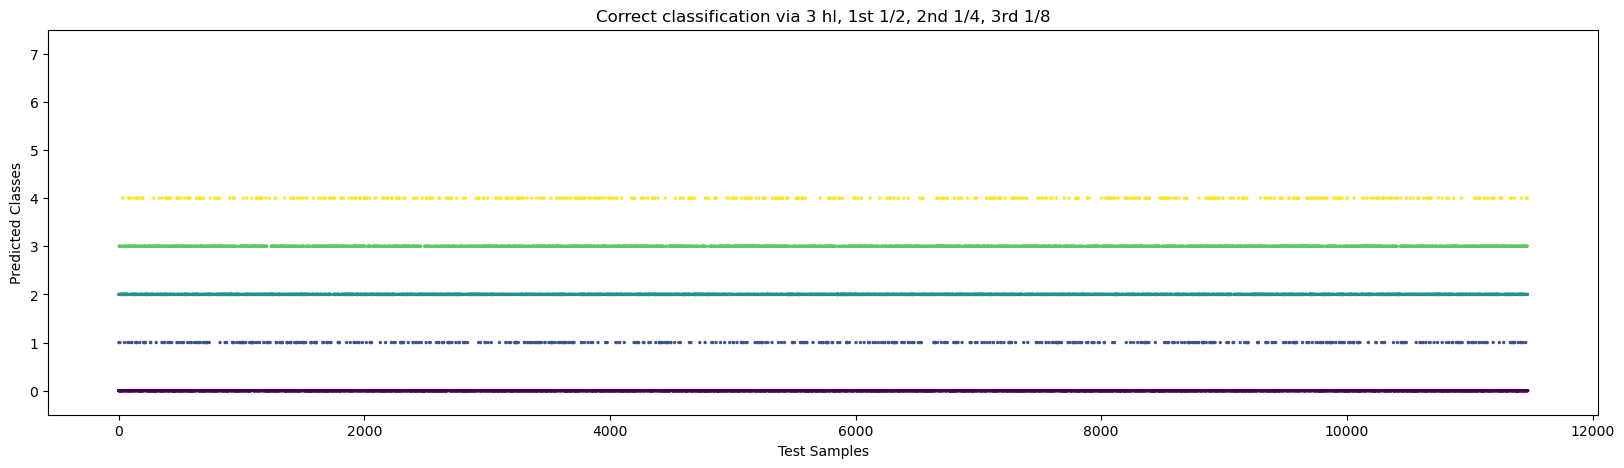

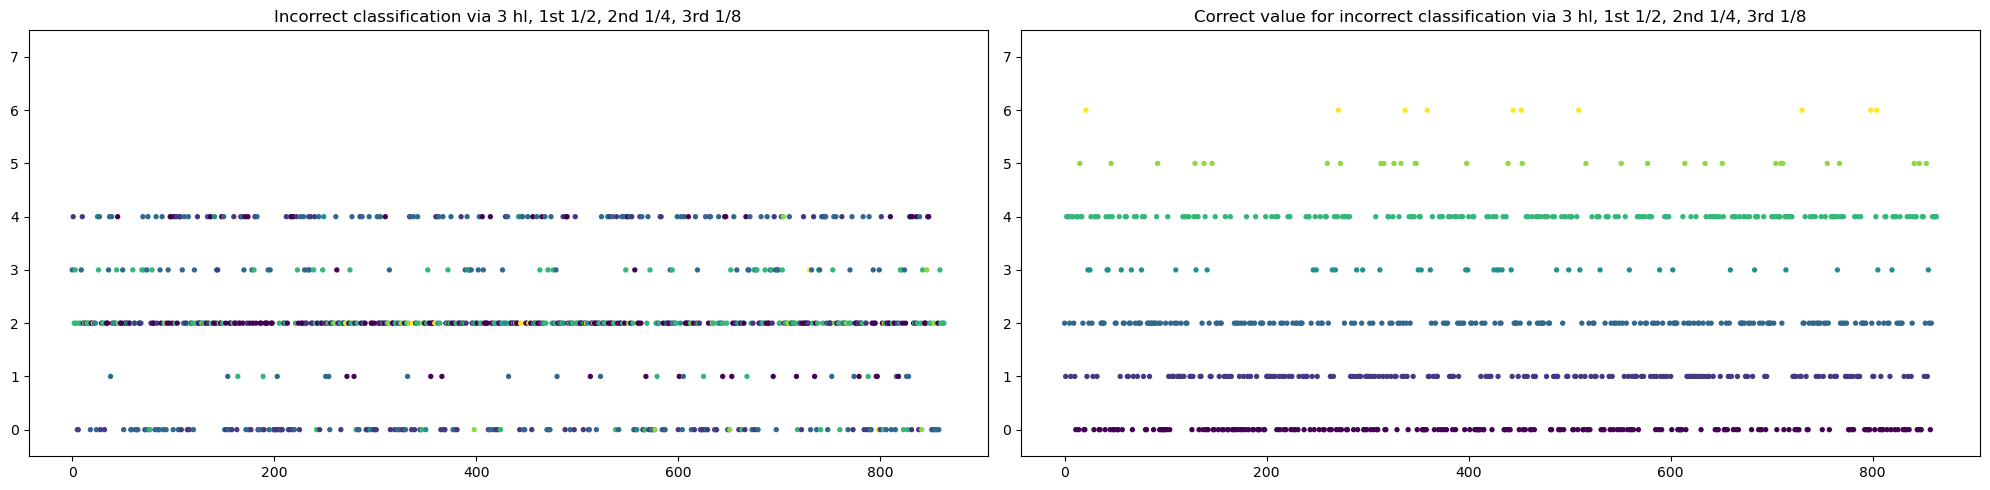

Incorrectly classified 864 samples out of 12337


In [17]:
plot_classification(y_pred_classes, y_test_classes, "3 hl, 1st 1/2, 2nd 1/4, 3rd 1/8")

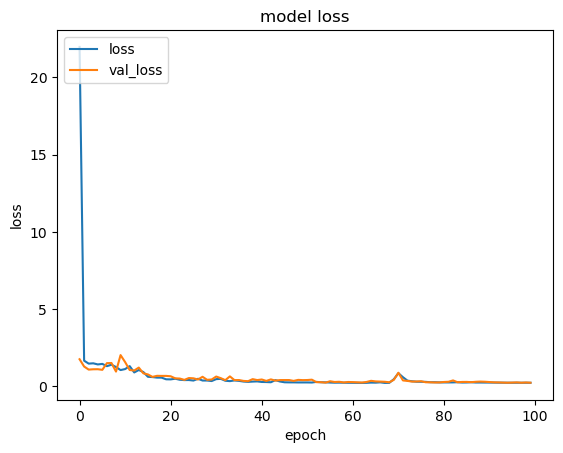

In [18]:
training_plot("training_history_3_layers_2_quarter_3_one-eighth.pkl")

## 4 hidden layers - 1st 1/2, 2nd & 3rd 1/4, 4th 1/8

In [19]:
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_2 = Dense( num_features//4, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense( num_features//4, activation='relu')(hidden_layer_2)
hidden_layer_last = Dense( num_features//8, activation='relu')(hidden_layer_3)
output_layer = Dense(classes_num, activation='softmax')(hidden_layer_last)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])

In [20]:
mlp_class.load_weights('best_model_4_layers_2_3_quarter_4_one-eighth.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 18/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_22']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 84.63%


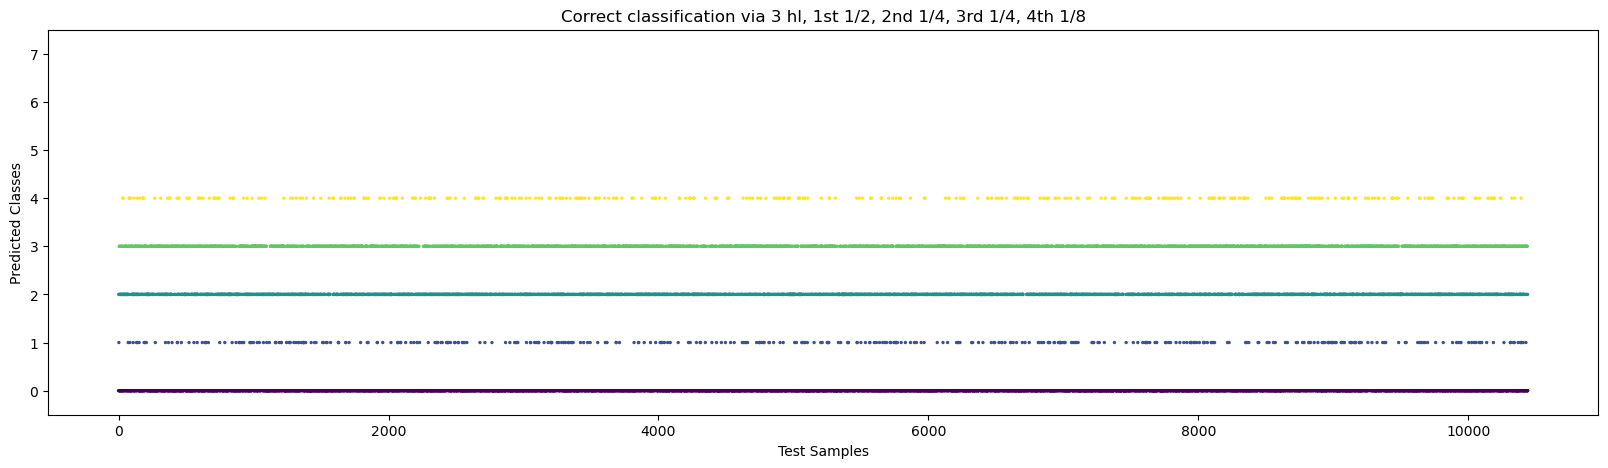

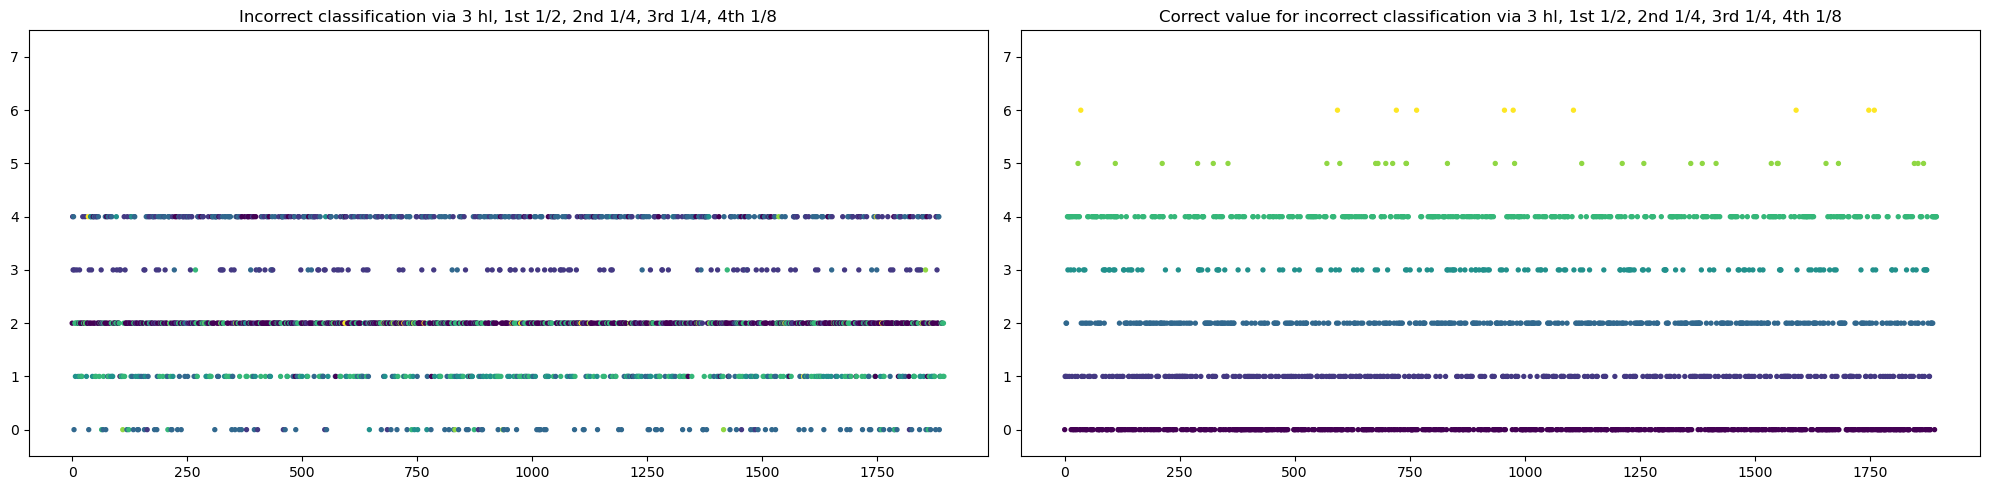

Incorrectly classified 1896 samples out of 12337


In [21]:
plot_classification(y_pred_classes, y_test_classes, "3 hl, 1st 1/2, 2nd 1/4, 3rd 1/4, 4th 1/8")

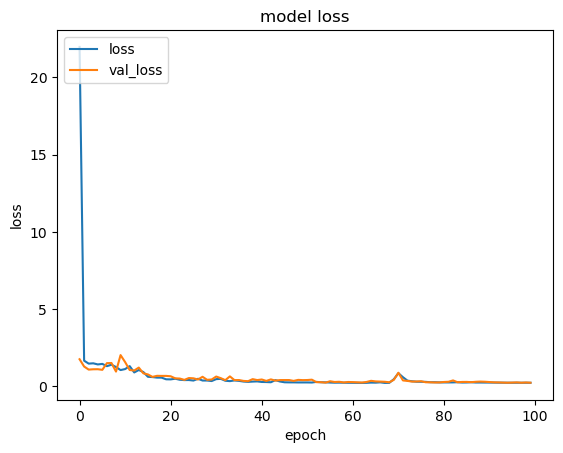

In [22]:
training_plot("training_history_4_layers_2_3_quarter_4_one-eighth.keras.pkl")

# Best result for 3 layers - 1st 1/2, 2nd & 3rd 1/4

## Test with dropout layer

In [23]:
from keras.layers import Dropout
num_features = X.shape[1]
input_layer = Input( shape = (num_features,) )
hidden_layer_1 = Dense( num_features//2, activation='relu')(input_layer)
hidden_layer_2 = Dense( num_features//4, activation='relu')(hidden_layer_1)
hidden_layer_last = Dense( num_features//4, activation='relu')(hidden_layer_2)
dropout_layer = Dropout(0.5)(hidden_layer_last)
output_layer = Dense(classes_num, activation='softmax')(dropout_layer)
mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.load_weights('dropout_best_model_3_layers_2_3_quarter-long-train-dropout.keras')
y_pred = mlp_class.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_test_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")

 30/386 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

D:\Users\crash\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_28']. Received: the structure of inputs=*
  warnings.warn(


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 94.95%


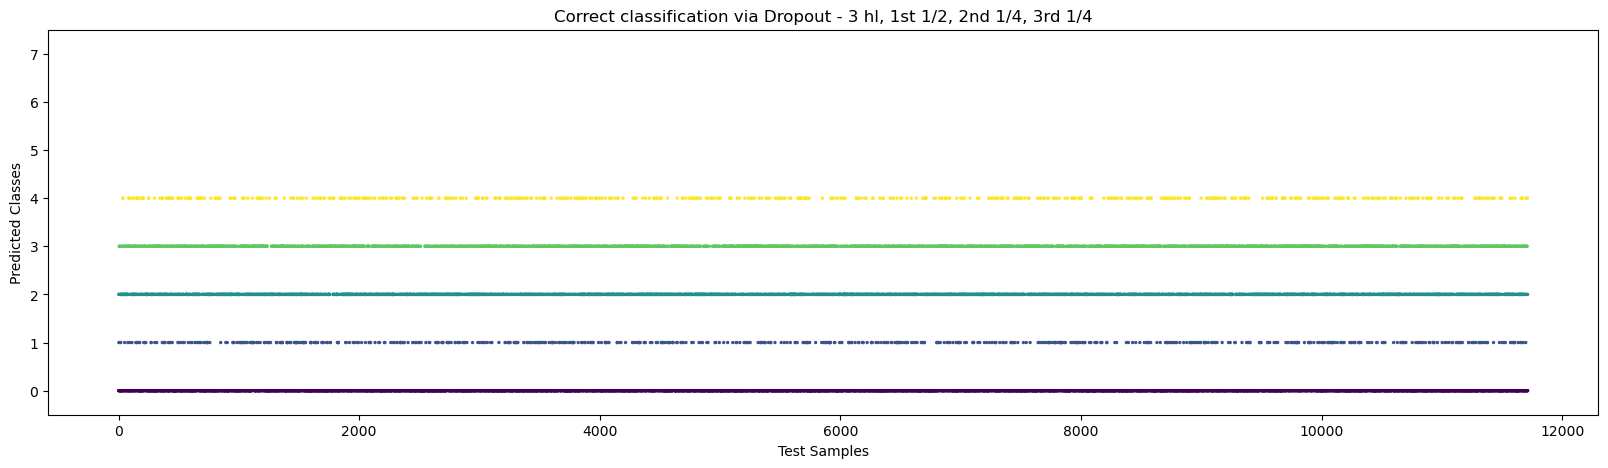

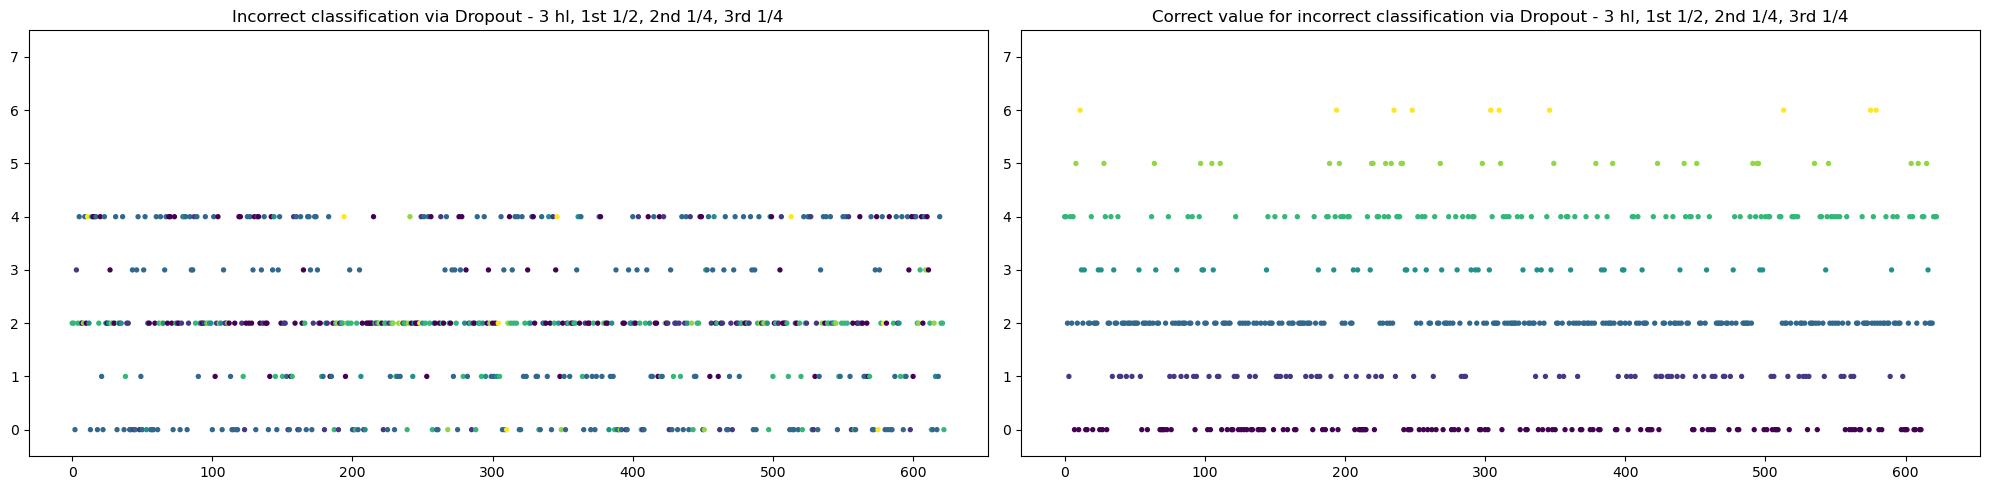

Incorrectly classified 623 samples out of 12337


In [24]:
plot_classification(y_pred_classes, y_test_classes, "Dropout - 3 hl, 1st 1/2, 2nd 1/4, 3rd 1/4")

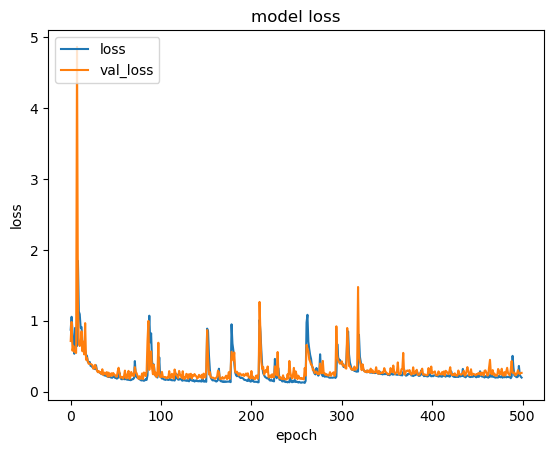

In [25]:
training_plot("training_history_dropout_3_layers_2_3_quarter-long-train.keras.pkl")

In [26]:
mlp_class.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2400)           │    11,522,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1200)           │     2,881,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1200)           │     1,441,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │         9,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,854,408 (60.48 MB)

 Trainable params: 15,854,408 (60.48 MB)

 Non-trainable params: 0 (0.00 B)

# Summary

None of the models correctly predicts classes 5 and 6. My reasoning for this observation is because of the noise presence coming from images, unbalanced dataset and classes themselves:

- 'Free Items' is class 5, 'Sporting Goods' is class 6. These are very general sounding categories, so the items in them can be extremely different. Model should have much more samples of these classes: current databse has 105 samples for class 5 and 25 for class 6. It's definitelly too few.
- Not all pixels from image are important; majory of images have white background which is not perfectly white (presence of some compression, light and shadow noise). These pixels shouldn't influence classification results in better models. Using PCA I will try to solve this problem.
- Some classes have significantly fewer samples.
- Probably curse of dimensionality

Dropout layer doesn't make much difference as I was also inspecting overfitting during training.